In [1]:
#now, we will add a vortex to the cylinder to what we had before 
#which will create lift!

In [2]:
import numpy as np
import math
from matplotlib import pyplot as py
import functs
%matplotlib inline

In [3]:
# define meshgrid
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X , Y = np.meshgrid(x, y)

In [4]:
kappa = 1.0                         #strength of doublet
x_doublet, y_doublet = 0.0, 0.0     #location of doublet

u_inf = 1.0   #freestream speed

In [5]:
#help(functs.get_stream_func_source)
#help(functs.get_stream_vortex)
#help(functs.get_streamfunc_doublet)
#help(functs.get_velo_doublet)
#help(functs.get_velocity_source)
#help(functs.get_velocity_vortex)

In [6]:
u_doublet, v_doublet = functs.get_velo_doublet(kappa, x_doublet, y_doublet, X, Y)

psi_doublet = functs.get_streamfunc_doublet(kappa, x_doublet, y_doublet, X, Y)

# freestream velocity components
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

# freestream stream function
psi_freestream = u_inf * Y

#superposition

u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

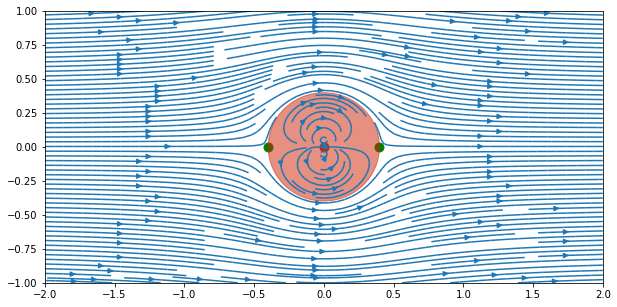

In [7]:
# now we can visualize the doublet before we add the vortex
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v, density=2)
py.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker = 'o')

#calculate cylinder radius and add cylinder to diagram
R = math.sqrt(kappa / (2 * math.pi * u_inf))
circle = py.Circle((0, 0), radius=R, color='#CD2305', alpha = 0.5)
py.gca().add_patch(circle)

#calculate the stagnation points and add them to diagram
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
py.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color = 'g', s = 80);

In [8]:
# now we'll add a vortex to show how we're gonna get lift
gamma = 4.0
x_vortex, y_vortex = 0.0, 0.0

In [9]:
u_vortex, v_vortex = functs.get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

psi_vortex = functs.get_stream_vortex(gamma, x_vortex, y_vortex, X, Y)

In [10]:
#apply superpostion of the doublet and vortex
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

In [ ]:
# calculate radius
R = math.sqrt(kappa / (2 * math.pi * u_inf))

#calculate the stagnations points
x_stagn1, y_stagn1 = (+math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                     -gamma / (4 * math.pi * u_inf))
x_stagn2, y_stagn2 = (-math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                     -gamma / (4 * math.pi u_inf))

# plot streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v)
circle = py.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha= 0.5)
py.gca().add_patch(circle)
py.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
py.scatter([x_stagn1, ])